In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# # Example input data
# x = torch.randn(10, 1000, 2)  # Shape [10, 1000, 3]
# y = torch.randn(1000, 1)  # Shape [1000, 1]

M=100
a=1
b=1
c=1

# # Reshape input to [10000, 3] => treat each time step independently
# x_train = x.view(-1, 2)  # Now we have 10 * 1000 = 10000 samples with 3 features each
# y_train = y.repeat(10, 1)  # Repeat the output to match the new sample size [10000, 1]

x=torch.FloatTensor(M,1).uniform_(0,10)
x_np = x.numpy()

# # Plot the histogram
# plt.figure(figsize=(6, 4))
# plt.hist(x_np, bins=30, edgecolor='black', alpha=0.7)
# plt.title('Histogram of Uniform Data')
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.show()

values = np.arange(0.1, 1.1, 0.1)  
samples_per_value = 10
t = np.repeat(values, samples_per_value)
t=torch.tensor(t,dtype=torch.float32)
t = t.view(M, 1)

x_train=torch.cat([t,x],dim=1)
y_train=a*torch.pow(x,2)+b*x+c+torch.FloatTensor(M,1).uniform_(0,1)

neuron=10
# Verify the reshaped dimensions
print(x_train.shape)  # Should be [10000, 3]
print(y_train.shape)  # Should be [10000, 1]

# Define a simple feedforward neural network
class FeedforwardNN(nn.Module):
    def __init__(self):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(2, neuron)    # Input layer expects 3 features
        self.fc2 = nn.Linear(neuron, neuron)
        self.fc3 = nn.Linear(neuron, 1)    # Output layer for regression
        
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
#         x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, define loss function and optimizer


torch.Size([100, 2])
torch.Size([100, 1])


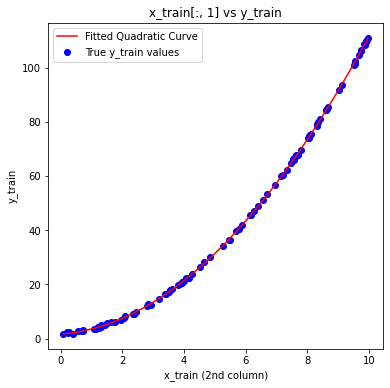

In [5]:
# Assuming x_train and y_train are PyTorch tensors; convert them to NumPy arrays
x_train_np = x_train.numpy()
y_train_np = y_train.numpy().ravel()  # Flatten y_train_np to 1D

# Create a figure for the plot
plt.figure(figsize=(6, 6))

# Scatter plot of true y_train values against x_train[:, 1]
plt.scatter(x_train_np[:, 1], y_train_np, color='b', label='True y_train values')

# Fit a quadratic curve to visualize the relationship
coeffs = np.polyfit(x_train_np[:, 1], y_train_np, 2)  # Fit a 2nd degree polynomial (quadratic)
poly = np.poly1d(coeffs)  # Create a polynomial function from the coefficients

# Generate x values for the fitted curve
x_vals = np.linspace(min(x_train_np[:, 1]), max(x_train_np[:, 1]), 100)
y_vals = poly(x_vals)  # Compute the fitted y values

# Plot the fitted quadratic curve
plt.plot(x_vals, y_vals, color='r', label='Fitted Quadratic Curve')

# Add labels, title, and legend
plt.title('x_train[:, 1] vs y_train')
plt.xlabel('x_train (2nd column)')
plt.ylabel('y_train')



plt.legend()

# Show the plot
plt.show()

In [6]:
model = FeedforwardNN()
criterion = nn.MSELoss()  # Mean Squared Error Loss for regression
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Training loop
num_epochs = 10000

for epoch in range(num_epochs):
    model.train()
    
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/10000], Loss: 1310.4767
Epoch [200/10000], Loss: 59.7362
Epoch [300/10000], Loss: 6.2252
Epoch [400/10000], Loss: 1.2583
Epoch [500/10000], Loss: 2.7406
Epoch [600/10000], Loss: 0.6888
Epoch [700/10000], Loss: 0.4174
Epoch [800/10000], Loss: 0.3075
Epoch [900/10000], Loss: 0.2442
Epoch [1000/10000], Loss: 0.1995
Epoch [1100/10000], Loss: 0.1668
Epoch [1200/10000], Loss: 0.2145
Epoch [1300/10000], Loss: 0.4041
Epoch [1400/10000], Loss: 0.1863
Epoch [1500/10000], Loss: 0.1639
Epoch [1600/10000], Loss: 0.2449
Epoch [1700/10000], Loss: 0.3188
Epoch [1800/10000], Loss: 1.3759
Epoch [1900/10000], Loss: 0.2343
Epoch [2000/10000], Loss: 0.7010
Epoch [2100/10000], Loss: 0.3279
Epoch [2200/10000], Loss: 0.5738
Epoch [2300/10000], Loss: 0.8409
Epoch [2400/10000], Loss: 0.2343
Epoch [2500/10000], Loss: 0.9218
Epoch [2600/10000], Loss: 0.4516
Epoch [2700/10000], Loss: 0.5002
Epoch [2800/10000], Loss: 0.4290
Epoch [2900/10000], Loss: 0.1837
Epoch [3000/10000], Loss: 0.7211
Epoch [3100/100